# <Step1. 탐색> : 데이터의 기초 정보 살펴보기

# . csv
행이 ',' 콤마로 구분된 파일
# . tsv
행이 '   ' tab로 구분된 파일
# excel(.xlsx) 파일은 내보내기 후 csv 또는 tsv 로 전환

# 데이터의 외형적 분석
1. 데이터의 출처
2. 데이터의 크기
3. 데이터의 구성요소

샘플링 (sampleing) 어떤 자료로 부터 값을 추출하는 것

# [Chipotle 데이터셋의 기본 정보]

In [36]:
# pandas 모듈 임포트
import pandas as pd

# read_csv() 함수로 데이터를 Dataframe 형태로 불러옵니다.
# pd.read_csv("파일경로를 포함한 파일명", sep="구분자")
# 로데이터를 상대 경로로 불러오기
file_path = '../data/chipotle.tsv'
chipo = pd.read_csv(file_path, sep='\t')

print(chipo.shape)
print("------------------------------------")
print(chipo.info())

(4622, 5)
------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


chipo 라는 Dataframe에서 순서대로 10개의 row 데이터를 보여줍니다.
head() 함수에 인수를 생략하면 기본 5개의 데이터를 보여줌

In [37]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [38]:
chipo.tail(10)

,order_id,quantity,item_name,choice_description,item_price
4612,1831,1,Carnitas Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$9.25
4613,1831,1,Chips,NaN,$2.15
4614,1831,1,Bottled Water,NaN,$1.50
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75
4616,1832,1,Chips and Guacamole,NaN,$4.45
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


In [39]:
# columns() 함수로 컴럼의 정보를 보여줌
print(chipo.columns)
print("-------------------------")
print(chipo.index)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
-------------------------
RangeIndex(start=0, stop=4622, step=1)


[Chipotle 데이터셋의 수치적 특징 파악]

quantity와 item_price의 요약 통계

describe() 함수로 요약 통계량 출력하기

In [40]:
# order_id는 숫자와 의미를 가지지 않기 때문에 str로 변환
chipo['order_id'] = chipo['order_id'].astype(str)
# chipo dataframe에서 수치형 피처들의 요약 통계량을 확인
chipo.describe()

,quantity
count,4622.000000
mean,1.075725
std,0.410186
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,15.000000


unique 함수로 범주형 피처의 개수 출력하기

In [41]:
# order_id의 개수를 출력
len(chipo['order_id'].unique())

1834

In [42]:
# item_name의 개수를 출력
len(chipo['item_name'].unique())

50

In [43]:
# 가장 많이 주문한 item : top 10을 출력합니다.
item_count = chipo['item_name'].value_counts()[:10]
for idx, (val, cnt) in enumerate(item_count.iteritems(),1):
    print("Top" , idx , ":", val, cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Steak Bowl 211
Top 7 : Chips 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


[item당 주문 개수와 총량 구하기]

In [44]:
# 아이템별 주문 개수를 출력합니다.
order_count = chipo.groupby('item_name')['order_id'].count()
order_count[:10] # 아이템별 주문 개수를 출력

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [45]:
# 아이템별 주문 총량을 계산합니다.
item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity[:10] # 아이템별 주문 총량을 출력

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

# <Step 2> 시각화로 분석 결과 살펴보기

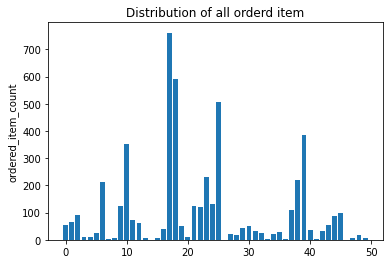

In [46]:
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# 아이템별 주문의 총량을 막대 그래프로 시각화
item_name_list = item_quantity.index.tolist()

# numpy.arange(시작, 끝, 간격) 으로 배열 만들기
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()

# bar()는 막대 그래프를 출력 하는 함수
plt.bar(x_pos, order_cnt, align='center')
plt.ylabel('ordered_item_count')
plt.title('Distribution of all orderd item')

plt.show()

아이템의 주문 개수를 출력

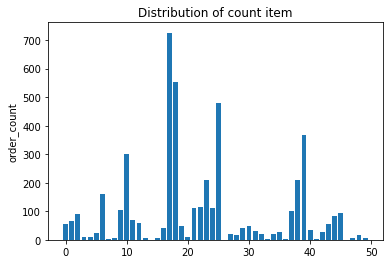

In [47]:
oo = order_count.index.tolist()
# oo
x_pos = np.arange(len(oo))
tt = order_count.values.tolist()
plt.bar(x_pos, tt, align='center')
plt.ylabel('order_count')
plt.title('Distribution of count item')
plt.show()

item_pruce 피처 살펴보기

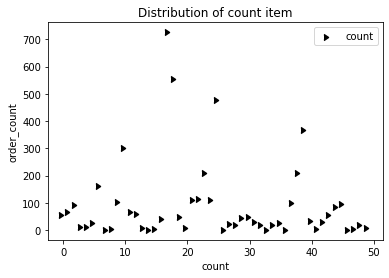

In [48]:
# scatter piot
plt.scatter(x_pos, tt, label="count", c ="black", marker=5 )
plt.xlabel('count')
plt.ylabel('order_count')
plt.title('Distribution of count item')
plt.legend(loc='upper right')
plt.show()

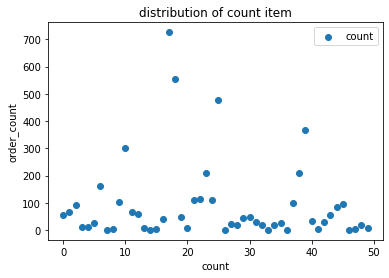

In [49]:
# scatter piot
plt.scatter(x_pos, tt, label="count")
plt.xlabel('count')
plt.ylabel('order_count')
plt.title('distribution of count item')
plt.legend(loc='best')
plt.show()

In [50]:
chipo.info()
print('---------')
chipo['item_price'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB
---------


0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

In [51]:
chipo['item_name'].value_counts()[:10]

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Steak Bowl                      211
Chips                           211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64

In [52]:
chipo['item_name'].unique().tolist()[:10]

['Chips and Fresh Tomato Salsa',
 'Izze',
 'Nantucket Nectar',
 'Chips and Tomatillo-Green Chili Salsa',
 'Chicken Bowl',
 'Side of Chips',
 'Steak Burrito',
 'Steak Soft Tacos',
 'Chips and Guacamole',
 'Chicken Crispy Tacos']

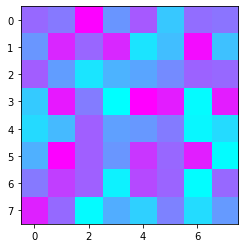

In [53]:
import numpy as np
import matplotlib.pyplot as plt

data = np.random.random((8, 8))
plt.imshow(data, cmap='cool', interpolation='nearest')
plt.show()

# <Step3. 데이터 전처리>

[Chipotle 데이터셋의 기본 정보]

In [54]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB


In [55]:
chipo['item_price'].head(10)

0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
5    $10.98 
6     $1.69 
7    $11.75 
8     $9.25 
9     $9.25 
Name: item_price, dtype: object

In [56]:
# colume 단위 데이터에 apply() 함수로 전처리를 적용
# item_price 문자열 타임의 데이터를 수치형으로 전처리
# apply() 함수는 시리즈 단위의 연산을 처리하는 기능을 수행하며, sum()이나 mean() 과 같이 연산이 정의된 함수를 파라미터로 받음
# lambda 뒤에 나오는 인수는 함수에서 사용 될 변수 x를 정의. 변수를 실수형으로 변환하는 float() 함수에 적용시킨 결과 x에 재대입
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))

In [57]:
chipo['item_price']

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

# <Step 4. 탐색적 분석 > 

[주문당 평균 계산금액 출력하기]

In [70]:
# 주문당이므로 order_id로 그룹을 생성한 뒤, item_price 피처에 sum() 함수를 적용하고 mean() 함수를 추가
chipo.groupby('order_id')['item_price'].sum()

order_id
1       11.56
10      13.20
100     10.08
1000    20.50
1001    10.08
        ...  
995     24.95
996     43.00
997     22.50
998     10.88
999     29.25
Name: item_price, Length: 1834, dtype: float64

In [59]:
Mean = chipo.groupby('order_id')['item_price'].sum().mean()
print("%.2f" % Mean)

18.81


In [60]:
round(chipo.groupby('order_id')['item_price'].sum().mean(),2)

18.81

[한 주문에 10달러 이상 사용한 주분 번호(id) 출력하기]

In [61]:
# sum() 함수로 주문당 주문수량과 주문가격 계산
chipo_orderid_group = chipo.groupby('order_id').sum()
results = chipo_orderid_group[chipo_orderid_group.item_price >=10]
results

,quantity,item_price
order_id,,
1,4,11.56
10,2,13.20
100,2,10.08
1000,2,20.50
1001,2,10.08
...,...,...
995,3,24.95
996,4,43.00
997,2,22.50


In [62]:
results[:10]

,quantity,item_price
order_id,,
1,4,11.56
10,2,13.20
100,2,10.08
1000,2,20.50
1001,2,10.08
1002,2,10.68
1003,2,13.00
1004,2,21.96
1005,3,12.15


In [63]:
results.index.values

array(['1', '10', '100', ..., '997', '998', '999'], dtype=object)

[각 아이템의 가격 구하기]

In [64]:
# 1단계 : 동일 아이템을 1개만 구매한 주문을 선별
chipo_one_item = chipo[chipo.quantity == 1]
price_per_item = chipo_one_item.groupby('item_name').min()
# sort_values() 함수를 통해 item_price를 기준으로 정렬
price_per_item.sort_values(by = "item_price", ascending = False)[:10]

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


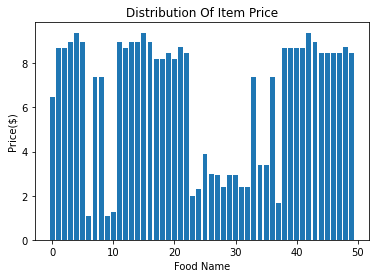

In [65]:
# price_per_item의 index를 1차원 리스트로 변환해서 item_name_list 변수에 대입
item_name_list = price_per_item.index.tolist()
# len(item_name_list)
# item_name_listㅂ 변수명이 길어 X축으로 다 출력할 수 없으므로 길이만큼 정수를 생성
x_pos = np.arange(len(item_name_list))
# price_per_item['item_price']로 price_per_item 중 item_price를 시리즈를 추출 후 tolist()함수로 1차원 리스트
item_price = price_per_item['item_price'].tolist()

# 막대그래프 출력
plt.bar(x_pos, item_price)
plt.xlabel("Food Name")
plt.ylabel("Price($)")
plt.title("Distribution Of Item Price")

plt.show()



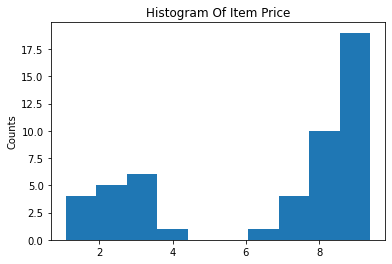

In [66]:
plt.hist(item_price)
plt.ylabel('Counts')
plt.title('Histogram Of Item Price')
plt.show()

In [67]:
# 가장 비싼 주문에서 아이템이 총 몇 개 팔렸는지를 계산
chipo.groupby('order_id').sum().sort_values(by='item_price', ascending=False)[:5]

,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30


# 'Veggie Salad Bowl'이 몇 번 주문되었는지 구하기

In [68]:
# 'Veggie Salad Bowl'이 몇 번 주문되었는지를 계산합니다.
chipo_salad = chipo[chipo['item_name'] == "Veggie Salad Bowl"]
# 한 주문 내에서 중복 집계된 item_name을 제거합니다.
chipo_salad = chipo_salad.drop_duplicates(['item_name' , 'order_id'])

print(len(chipo_salad))
chipo_salad.head(5)


18


,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


# 'Chicken Bowl' 을 2개 이상 주문한 고객들의 ' Chicken Bowl' 메뉴에 대한 총 주문 수량 구하기

In [75]:
# "Chicken_bowl"을 2개 이상 주문한 고객들의 "Chicken Bowl" 메뉴의 총 주문 수량을 구합니다.
chipo_chicken = chipo[chipo['item_name'] == "Chicken Bowl"]
chipo_chicken_ordersum = chipo_chicken.groupby('order_id').sum()['quantity']
chipo_chicken_result = chipo_chicken_ordersum[chipo_chicken_ordersum >= 2]

print(len(chipo_chicken_result))
chipo_chicken_result.head(5)

114


order_id
1004    2
1023    2
1072    2
1078    2
1091    2
Name: quantity, dtype: int64